# NYC High School Data Analysis through SAT Scores

This project uses datas about the New Yor City public schools.

Perhaps the most controversial isse about the U.S. educational system is if the standardized tests are efficient. There is a lot of bias the test is unfair to certain groups. Investigating the correlations between SAT Scores and demographics will directly tell us if the general consensus holds any truth in it. SAT scores' association with factors such as race, income, gender and more will provide insight on the matter.

The SAT (Scholastic Aptitude Test) test comprised of three sections, each with 800 max points. The combined possible maximum score being 2.400. For you information, the scoring system have changed multiple times. But the data set we have is based on this scoring system. The schools are ranked after their average SAT score by organizations. A schools overall quality is judged by the average number of said school's score as well.

# Finding Data
New York City shares the data on high school SAT Scores [available online](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4). [The demographics data](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) is shared as well.

This data is although plenty we'll need more to answer our questions.

Here are the links to all of the data sets we'll be using:

[SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
[School attendance]() - Attendance information for each school in New York City
[Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
[AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
[Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated, and other outcome information
[Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
[School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

The datasets are complimentary and combining them will prove useful. I've also shared datasets in my repository: datasets/schools/.

## Providing some background information

Since not everyone lives in US and New York City, some background information will prove useful beforehand:

* Only the high school students take the SAT test so our focus are on high schools.
* New York City is comprised of five boroughs, which are distinct regions of the city.
* Every borough has high schools as well as others in them so they are a category as well.
* The data sets include different types of schools as well. We need to subset the data into high schools.
* District Borough Number (DBN) is a code who identifies school and is unique across the boroughs.

## Read in the data

In [1]:
import pandas as pd
import numpy
import re


# Create a list after the datasets' names
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {} # Dictionary to hold our datasets

for f in data_files:
    d = pd.read_csv("datasets/nyc/{0}".format(f))
    data[f.replace(".csv", "")] = d # take out the .csv so ap_2010.csv becomes ap_2010 holding dataframe name

Now let's read the text data and combine them together.

# Read in the surveys

In [2]:
all_survey = pd.read_csv("datasets/nyc/survey_all.txt", delimiter="\t", encoding='windows-1252') #reading texts
d75_survey = pd.read_csv("datasets/nyc/survey_d75.txt", delimiter="\t", encoding='windows-1252') #setting delimiter and encoding
survey = pd.concat([all_survey, d75_survey], axis=0) # join them

survey["DBN"] = survey["dbn"] # setting the column to uppercase letters
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11,DBN
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M015
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M019
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M020
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M034
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M063


We're going to pick the columns we need out of the survey and add the end result to our data dictionary.

In [3]:
# the columns we need
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields] # take only the columns we need
data["survey"] = survey # and add it to the data as a dataframe

# Add DBN columns

DBN is the identifier for the schools. It is the column we're going to operate around. Joining all these datasets into one will only be available with it. But some of our data doesn't have the information. When taken a second look `hs_directory` does have it but it is lower cased. Renaming it will solve the problem.

However, `class_size` doesn't appear to have the column at all.

Looking at the data we find out DBN is a combination of CSD and SCHOOL CODE columns in th data. The only difference is it is padded. CSD portion of the combination is always two digits. We need to compensate for that in our CSD column.

In [4]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"] # renaming the column

def pad_csd(num):                                # take a number
    string_representation = str(num) # make it a string
    if len(string_representation) == 2: # if it's two digits
        return string_representation # return
    elif len(string_representation) == 1: # if it's not
        return string_representation.zfill(2) # make it double digits
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd) # apply the function to the column
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"] # combine to get DBN
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


## Sat Score Total

We're comparing high schools by their SAT Scores. There are 3 columns storing infomation for SAT scores. It's more practical to combine them into a total average and use that score for our analysis. Three SAT score columns are 'SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score'. We're going to sum them and create a column `sat_score`.


# Convert columns to numeric

In [5]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

## Extracting geological information

We can use this information plot a geographical visualization.

To plot geographical information we need location informations called latitude and longitude. Our dataset holds that information. But the data is messy. Using regular expression to extract them from the datasets and fix what's left by str.replace is our approach.

In [6]:
# A function extracts latitude
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# A function extracts longitude
def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

#Applying our functions on relevant columns
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

#Converting them to numerical values
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# Condense datasets

Before hand we discussed our dataset is made up of all types of schools. But we're only interested in high schools. Let's take a closer look to relevant columns.

In [7]:
class_size = data["class_size"]
print(class_size['GRADE '].value_counts(),'\n')
print(class_size['PROGRAM TYPE'].value_counts(),'\n')

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE , dtype: int64 

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64 



## Subsetting

To focus high schools, subsetting `Grade` column to 09-12 will do.

We also want to subset Program Type. Choosing the most common type will make sure we have the most common denominator. In theory it should better represent the population.

Also schoolyear is another problem.
* One, it hurts DBN's identifying quality as it duplicates the rows.
* We're working on the latest data and to do that keeping the analysis limited to recent year available is better.

`demographics` data holds the column `schoolyear` and we're going to pick 20112012 as it is the latest season there is.

The other subsettings we'd like to have are from Cohort and Demographic column. The Cohort column has it's recent data from 2006 so we're getting that. To keep us on the track of wholesome approach, as we're doing with Program Type we'll get Total Cohort from Demographic column as well.

In [8]:
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Convert AP scores to numeric

We have to convert them to numeric in order analyze or use descriptive statistics.

Advanced PLacement (AP) scores has a scale rangim from 1 to 5. Passing score is 3 and higher values are better.

It's the academically challenging institutions that usually has this exam. They are more rare iwth schools that lack funding or high academic status.

We're aiming to look for a correlation between AP and SAT scores. To do that we need the column to be in numeric values. The columns are :
* AP Test Takers
* Total Exams Taken
* Number of Exams with scores 3 4 or 5


In [9]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Combine the datasets

Combining the datasets are trick, to say the least. The different methods of joining makes it complicated. It happens around planning and the decisions depend on how you need the end product to be.

In [10]:
combined = data["sat_results"] # we're creating a new variable for our new dataframe

combined = combined.merge(data["ap_2010"], on="DBN", how="left") # a left join combined
combined = combined.merge(data["graduation"], on="DBN", how="left") # another left join

to_merge = ["class_size", "demographics", "survey", "hs_directory"] # creating a list to make things faster

for m in to_merge: # iterating the list
    combined = combined.merge(data[m], on="DBN", how="inner") # merging them into combined

combined = combined.fillna(combined.mean()) # filling the missing values with their respective averages
combined = combined.fillna(0) # if any missing value is still there, make it 0 -strings won't have mean values

# Add a school district column for mapping

We've discussed that one of our aims is to analyze the data by districts. Mapping them could give us a quick look about how the schools are distributed. The first two digits in the DBN numbers are the district identifiers. If we extract them and create a column after their name we're making data analysis-ready.

In [11]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars) # extracting the first two chars

# Find correlations

We have our data ready for analysis now. Let's look at the correlations.


In [12]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64


# Analysis and Visualization

The end result isn't helping much in text form. We can use plotting to better take a quick look. But DBN since it's an identifier don't hold any value.

In [13]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

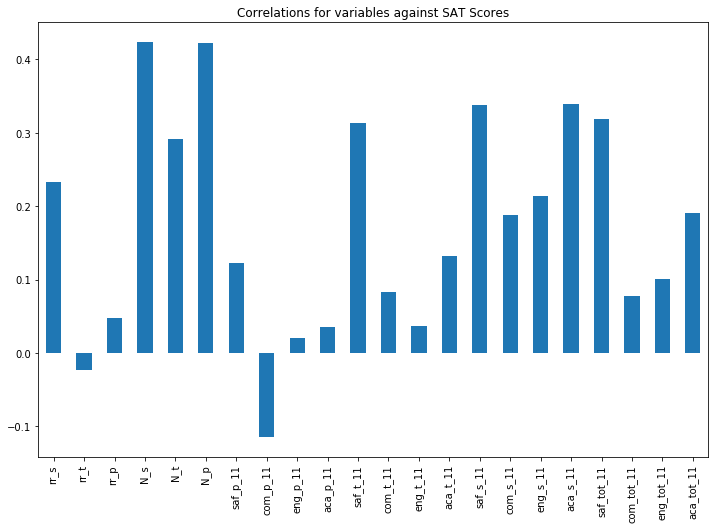

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

combined.corr()['sat_score'][survey_fields].plot.bar(figsize=(12,8), title='Correlations for variables against SAT Scores')

There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

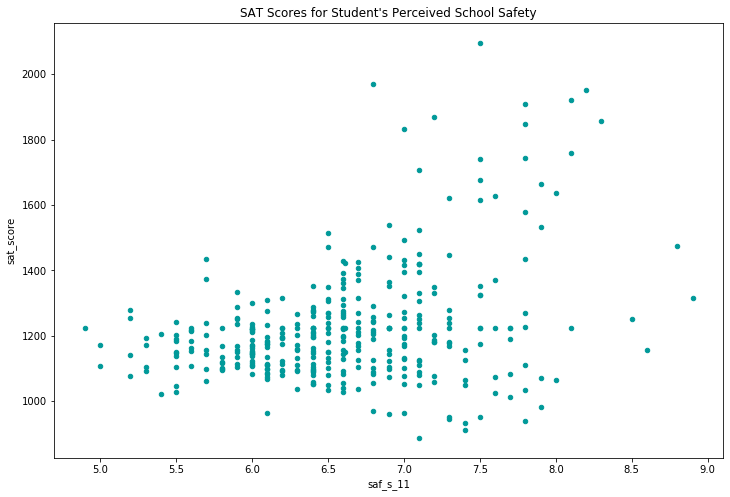

In [15]:
combined.plot.scatter(x='saf_s_11', y='sat_score', c='#009999', edgecolors='face', figsize=(12,8), title="SAT Scores for Student's Perceived School Safety")

There seems to be a correlation between self-reported safety of schools and sat scores -although not a strong one. The most important point to me is the fact **that there aren't any schools above 1500 SAT score below 6.5 safety point.** There are some high scores with extremely high sat_core and a high saf_s_11 as well as low sat_scores as well.

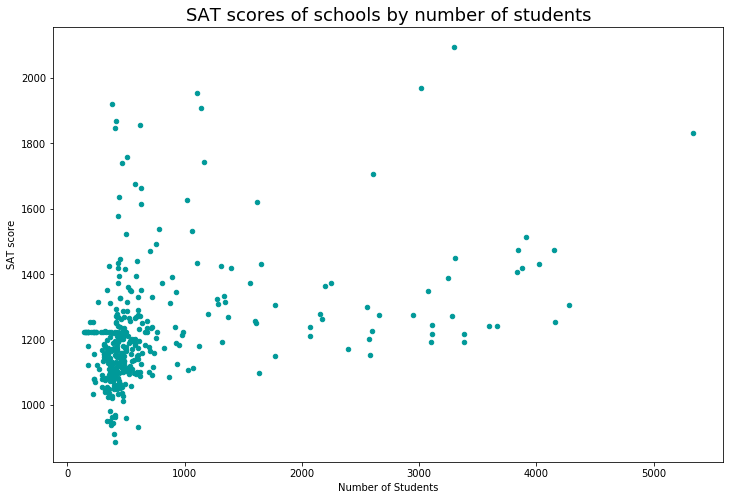

In [16]:
ax = combined.plot.scatter(x='total_enrollment', y='sat_score', c='#009999', edgecolors='face', figsize=(12,8))
ax.set_xlabel('Number of Students')
ax.set_ylabel('SAT score')
ax.set_title('SAT scores of schools by number of students',fontdict={'fontsize':18} )
plt.show()

High number of students seem to get a bit better SAT Scores on average. But the correlation is weak. This fact is against the contrary belief that schools who accept less students are better. But if taken a second look, this is still probably true. When focusing at High SAT Scores at 1500 or higher, you do see more data points below 1000 as number of students. So this is a double edged sword and is hard to gauge.

The cluster of points on the bottom left looks like where the high correlation occurs. Let's list their names so we can keep them on our mind for further occurences.

In [17]:
low_enrollment = combined.loc[combined['total_enrollment'] <1000]
low_enrollment = combined.loc[combined['sat_score']<1000]
print(low_enrollment['School Name'])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


Noted. Let's move on. Let's take a look of things on a map.

In [18]:
# This cell is a bug fix that occurs with Basemap installation, so it won't be necessary for you.
import os

os.environ['PROJ_LIB'] = r'C:\Users\kaang\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

C:\Users\kaang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
C:\Users\kaang\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


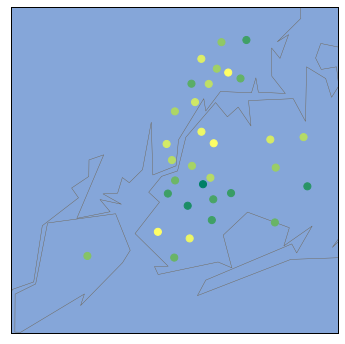

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

districts = combined.groupby('school_dist').mean()
districts.reset_index(inplace=True)

plt.figure(figsize=(12,6))

m = Basemap(
    projection='merc',
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts['lon'].tolist()
latitudes  = districts['lat'].tolist()
m.scatter(x=longitudes, y=latitudes, s=50, zorder=2, latlon=True, c=districts['saf_s_11'], cmap='summer')



It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores. High socioeconomic status boroughs do end up getting better results on average and worse ones tend to do worse on SAT Scores. This is another picture of socioeconomic inequality creating a disparancey on education.

# Exploring Race and SAT Scores

Let's look at races and how they do on SAT Scores.

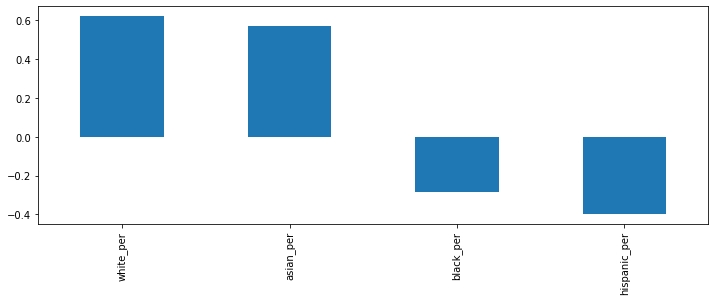

In [20]:
race_cols = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()['sat_score'][race_cols].plot.bar(figsize=(12,4))

The white and asian populations' sat_scores are correlated heavily positive. Whereas the African American and hispanic groups have negative correlation. This is an important finding. We need to delve deeper to get more insights as to why this may be occuring.

Let's look at how hispanic percentage columns correlates with sat scores.

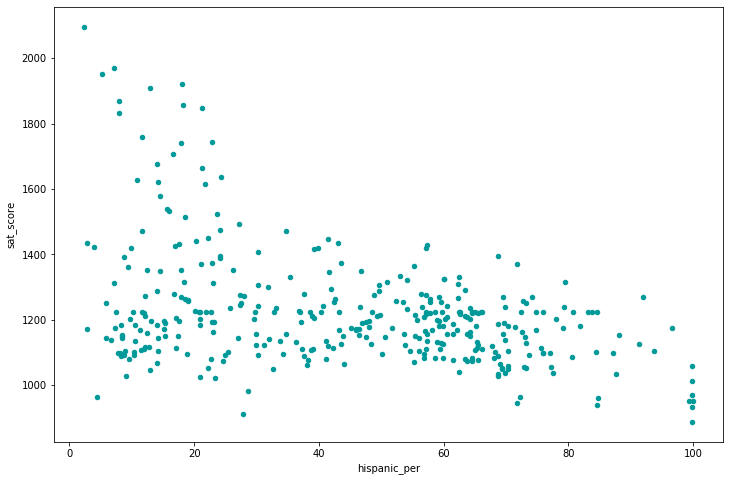

In [21]:
combined.plot.scatter('hispanic_per', 'sat_score', c='#009999', edgecolors='face', figsize=(12,8))

Below %30 rates are distributed normally but the percentage increase do come with lower averages. This could be because low socioecomoic status caused by immigration. Note the right bottom cluster. Let's focus on it.

In [22]:
print(combined[combined['hispanic_per'] > 95]['SCHOOL NAME'])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools seemed to be the ones which are preffered from recent immigrants to US. Which indicates **a low level of life standard and a language barrier explaining the low sat_score levels.**

In [23]:
print(combined[((combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800))]['SCHOOL NAME'])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Schools above are highly technical and and high ons 

cientific rgiour, receives extra funding and accepts students after making them pass an entrance exam. This could be the explanation of high sat_scores --but not the the low hispanic_per. The low hispanic percentage could very well be the result of normal distribution. The hispanics are populated 47 Million as american citizens in the US. Corresponding around a %15. This is also the mean of normal distributed sat scores for hispanic percentage. So higher than normal percentages is more likely to signal immigration signaling and the issues that comes with it.


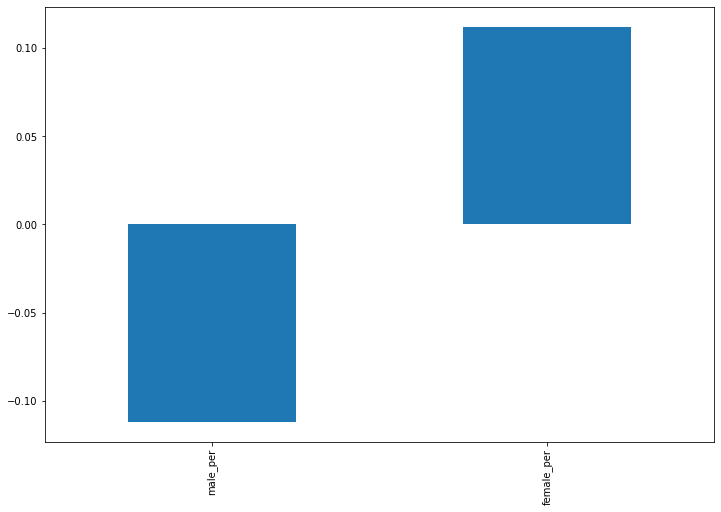

In [24]:
combined.corr()['sat_score'][['male_per','female_per']].plot.bar(width=0.5, figsize=(12,8))

Higher percentage of female student population in a school correlates positively whereas higher male student population does so negatively. 

But, neither correlations are strong.

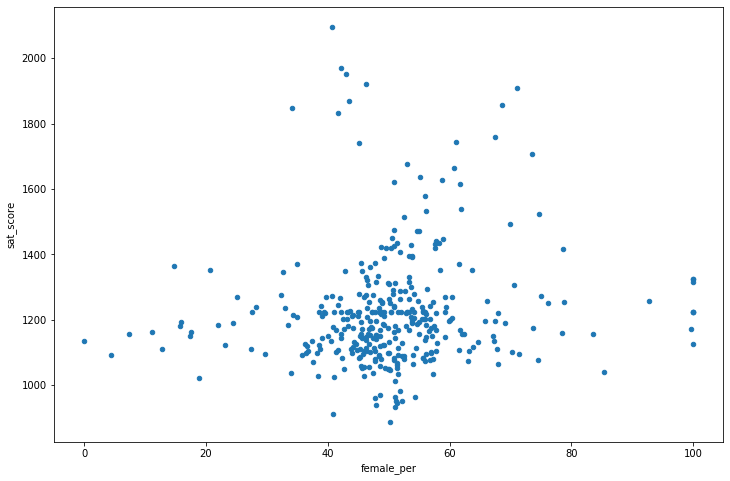

In [25]:
combined.plot.scatter('female_per','sat_score', figsize=(12,8))

There doesn't seem to be a correlation between female percentage and sat scores.

But the female percentage for the schools with high sat scores (1800+) sit between 40-70. Normal distributed schools are tend to do better.

Let's look at them on an individiual level.

In [26]:
print(combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]['SCHOOL NAME'])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [27]:
print(combined[(combined['female_per'] > 40) & (combined['female_per'] < 80) &(combined['sat_score'] > 1700)]['SCHOOL NAME'])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
37                                STUYVESANT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
151                         BRONX HIGH SCHOOL OF SCIENCE
155    HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
198                           BROOKLYN LATIN SCHOOL, THE
302                          TOWNSEND HARRIS HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools seem to be selective liberal arts school with high academic standards.

## AP Exam Scores vs SAT Scores

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.

Analyzing this variable with a percentage approach will yield better results.

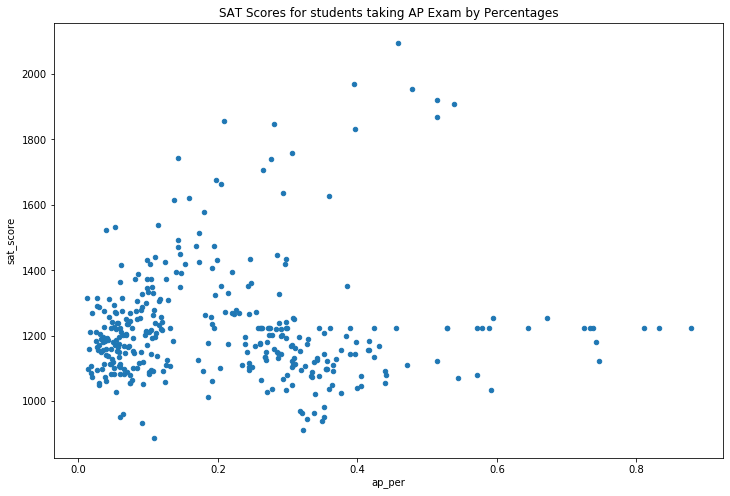

In [28]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"] # Create an AP Exam takers percentage column

combined.plot.scatter(x='ap_per', y='sat_score', figsize=(12,8), title='SAT Scores for students taking AP Exam by Percentages')

The correlation isn't strong, even if there's any.

AP Exams don't seem to be holding any weight when it comes to SAT Scores.

## Conclusion


As findings show:

The factors matter the most to a school's SAT performance are perceived safety scores of students and the percentage of English language learners. The schools which do entrance test tend to have a better performance as well.

Location of Queens, Manhattan and Bronx do better as well. Where as Brooklyn has lower scores.

Asians and Whites do better on SAT where Blacks and Hispanics tend to do worse. After inspected, these groups' schools are environments that is less safe and mostly are immigrant populated schools. So the issues of low socioeconomics and a language barrier are at work.

Advanced Placement (AP) exam takers don't necessarily do well on SAT scores.

**Notes: The data is generally is outdated (in part from 2011). 
Also, there are other metrics to judge the quality of education. SAT score is only one of them.**

